## SALUD

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [5]:
dir_input = Path("data/base100/")
ipc_file = dir_input / "base_salud.xlsx"

PESO_TOTAL = 3.475   # Peso total oficial de la división Salud

In [ ]:
df_ipc = pd.read_excel(ipc_file)
df_ipc.columns = df_ipc.columns.str.upper()

# Lista de categorías tal como aparecen en el archivo
categorias = df_ipc["CATEGORIA"].tolist()

print("Categorías detectadas:")
for i, c in enumerate(categorias):
    print(i + 1, c)

Categorías detectadas:
1 ANTICONCEPTIVOS
2 ANTIINFECCIOSOS SISTÉMICOS
3 APARATO CARDIOVASCULAR
4 APARATO DIGESTIVO
5 APARATO GENITOURINARIO Y REPRODUCTOR
6 APARATO RESPIRATORIO
7 OFTALMOLÓGICOS
8 PIEL Y MUCOSAS
9 SANGRE, LÍQUIDOS Y ELECTROLITOS
10 SISTEMA NERVIOSO


In [8]:
pesos_manual = [
    0.016,
    0.159,
    0.137,
    0.107,
    0.065,
    0.182,
    0.058,
    0.085,
    0.024,
    0.237
]

In [10]:
# NORMALIZACIÓN (1ra normalización)
suma_original = sum(pesos_manual)
factor = PESO_TOTAL / suma_original
pesos_norm = [p * factor for p in pesos_manual]

print("\nSuma original:", suma_original)
print("Suma normalizada:", sum(pesos_norm))

# Mostrar tabla de pesos normalizados
df_pesos = pd.DataFrame({
    "CATEGORIA": categorias,
    "PESO": pesos_manual,
    "PESO_NORMALIZADO": pesos_norm
})

display(df_pesos)


Suma original: 1.07
Suma normalizada: 3.475


,CATEGORIA,PESO,PESO_NORMALIZADO
0,ANTICONCEPTIVOS,0.016,0.051963
1,ANTIINFECCIOSOS SISTÉMICOS,0.159,0.516379
2,APARATO CARDIOVASCULAR,0.137,0.444930
3,APARATO DIGESTIVO,0.107,0.347500
4,APARATO GENITOURINARIO Y REPRODUCTOR,0.065,0.211098
5,APARATO RESPIRATORIO,0.182,0.591075
6,OFTALMOLÓGICOS,0.058,0.188364
7,PIEL Y MUCOSAS,0.085,0.276051
8,"SANGRE, LÍQUIDOS Y ELECTROLITOS",0.024,0.077944
9,SISTEMA NERVIOSO,0.237,0.769696


In [11]:
# CÁLCULO DEL IPC DE LA DIVISIÓN (PROMEDIO GEOMÉTRICO PONDERADO)

# SOLO columnas que contienen "2025"
cols_fechas = [c for c in df_ipc.columns if "2025" in c]

w = np.array(pesos_norm)

def geom_pond(x, w):
    x = np.array(x)
    return np.exp(np.sum(w * np.log(x)) / np.sum(w))

ipc_salud = {}

for col in cols_fechas:
    ipc_salud[col] = geom_pond(df_ipc[col], w)

# Serie final ordenada por fecha
ipc_salud = pd.Series(ipc_salud)
ipc_salud.index = pd.to_datetime(ipc_salud.index)
ipc_salud = ipc_salud.sort_index()

print("\nIPC de la División SALUD:")
display(ipc_salud)


IPC de la División SALUD:


2025-10-29    100.000000
2025-10-30     99.950358
2025-10-31     99.949628
2025-11-01    100.512931
2025-11-02    100.512931
2025-11-03     99.745337
2025-11-04     99.679551
2025-11-05     99.494195
2025-11-06     99.717012
2025-11-07     99.493807
2025-11-08    100.025220
2025-11-09    100.025220
2025-11-10    100.005450
2025-11-11    100.034335
2025-11-12     99.886094
2025-11-13    100.028452
2025-11-14    100.017653
2025-11-15    100.017653
2025-11-16    100.456510
2025-11-17    100.025426
dtype: float64

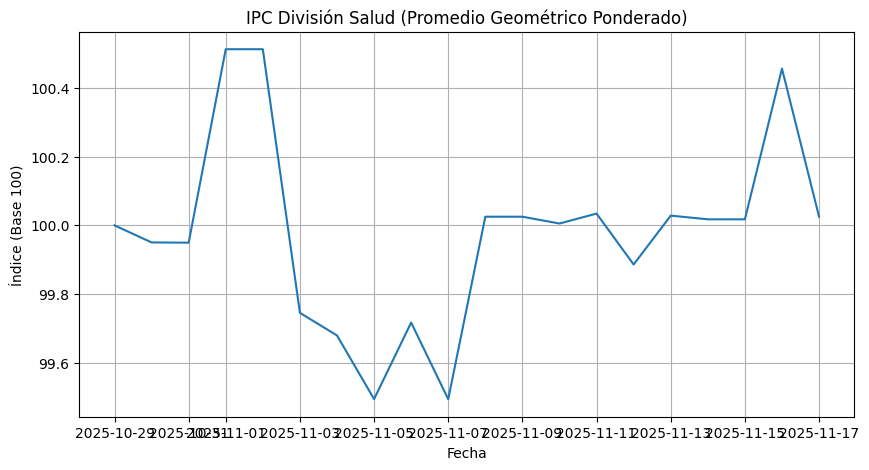

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(ipc_salud.index, ipc_salud.values)
plt.title("IPC División Salud (Promedio Geométrico Ponderado)")
plt.xlabel("Fecha")
plt.ylabel("Índice (Base 100)")
plt.grid(True)
plt.show()

## ALIMENTOS 

## EDUCACIÓN

## COMBUSTIBLES

## VIVIENDA


## INDICE FINAL